Dataset loaded successfully!


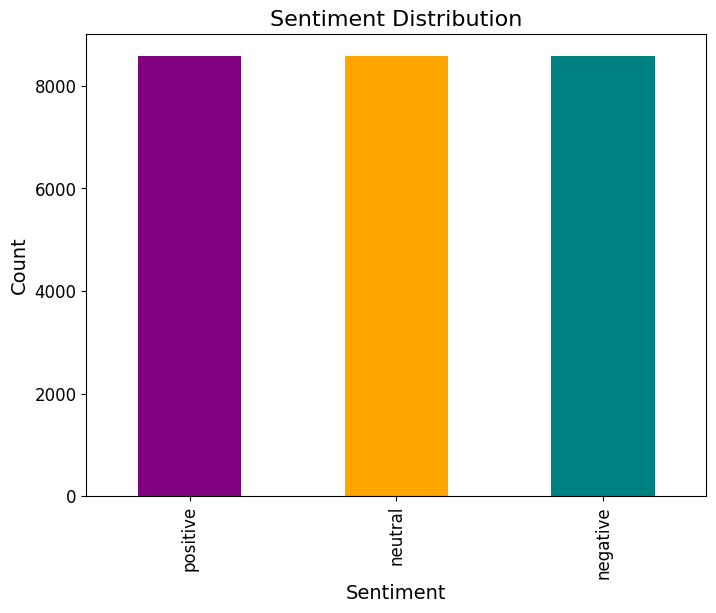

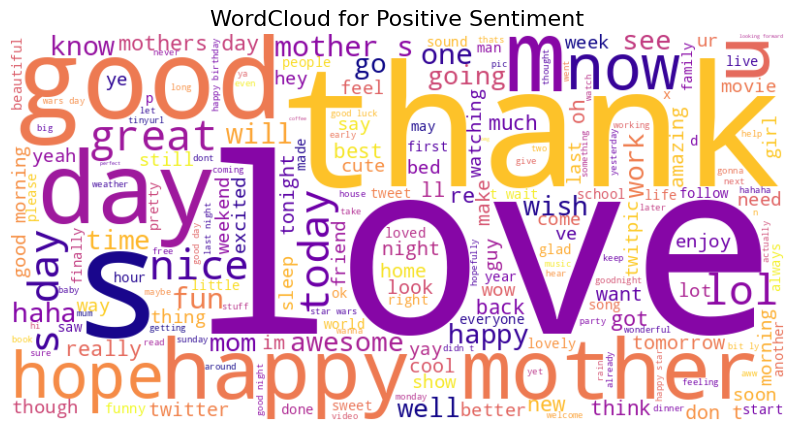

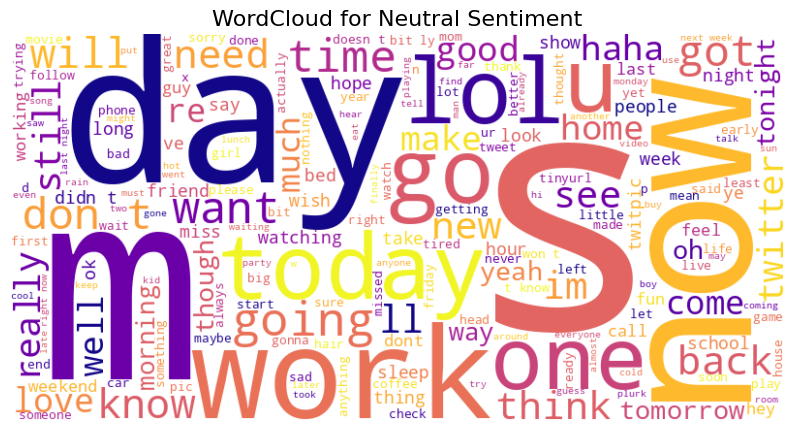

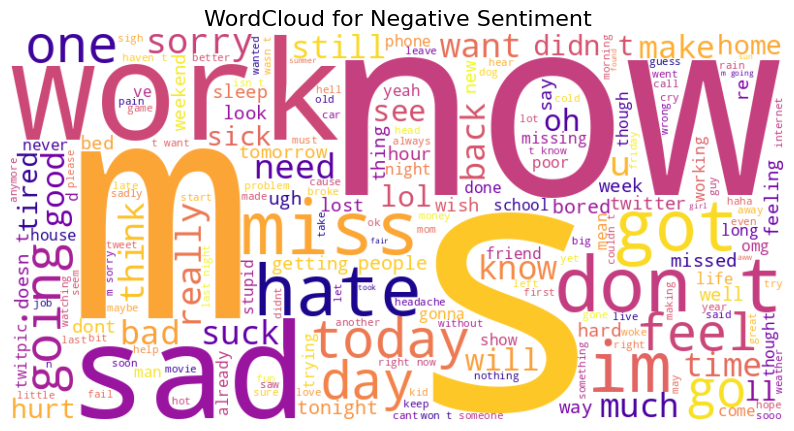

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5423 - loss: 0.9215
Epoch 2/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7971 - loss: 0.5219
Epoch 3/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8673 - loss: 0.3709
Epoch 4/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9038 - loss: 0.2760
Epoch 5/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9306 - loss: 0.2011
Epoch 6/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9478 - loss: 0.1543
Epoch 7/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9580 - loss: 0.1223
Epoch 8/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9686 - loss: 0.0930
Epoch 9/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9728 - loss: 0.0792
Epoch 10/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9752 - loss: 0.0714
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
K-Means Clustering Accuracy: 0.332621359223301
Confusion Matrix for K-Means:


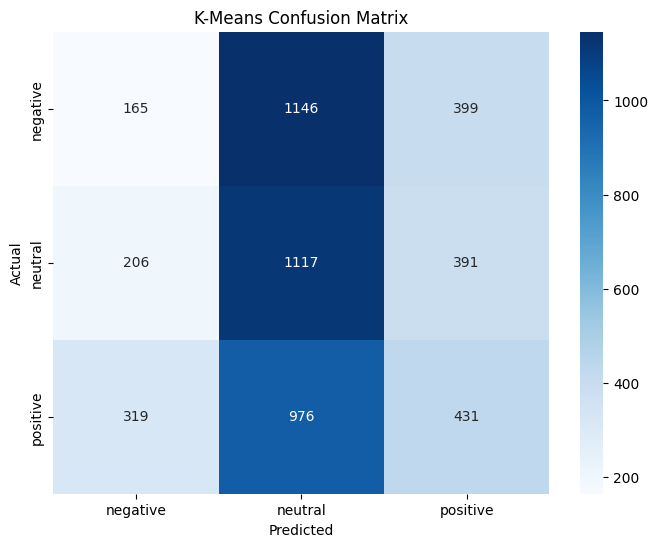

Neural Network Confusion Matrix
[[1421  233   56]
 [ 182 1318  214]
 [  87  377 1262]]


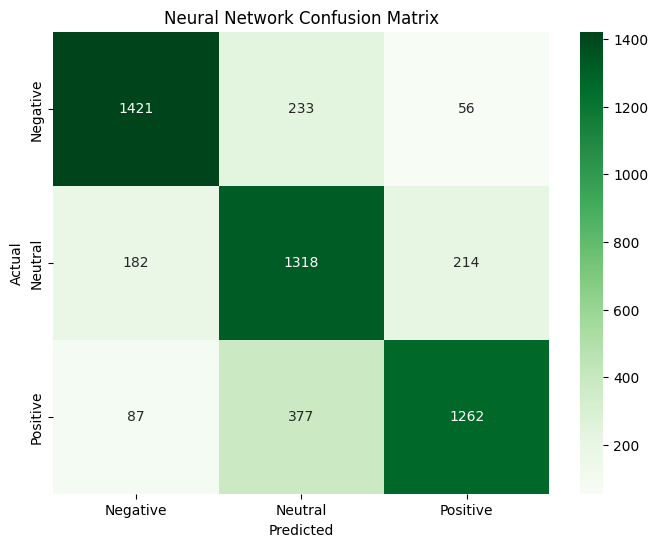

Decision Tree Confusion Matrix
[[1405  194  111]
 [ 217 1273  224]
 [ 194  336 1196]]


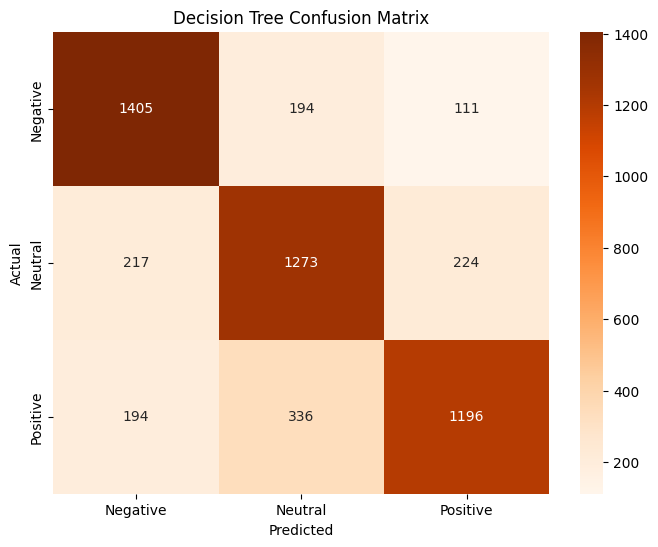

K-Means Classification Report
              precision    recall  f1-score   support

    negative       0.24      0.10      0.14      1710
     neutral       0.34      0.65      0.45      1714
    positive       0.35      0.25      0.29      1726

    accuracy                           0.33      5150
   macro avg       0.31      0.33      0.29      5150
weighted avg       0.31      0.33      0.29      5150

Neural Network Classification Report
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1710
           1       0.68      0.77      0.72      1714
           2       0.82      0.73      0.77      1726

    accuracy                           0.78      5150
   macro avg       0.78      0.78      0.78      5150
weighted avg       0.78      0.78      0.78      5150

Decision Tree Classification Report
              precision    recall  f1-score   support

    negative       0.77      0.82      0.80      1710
     neutral       0.71   

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import resample
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import os

# Load the dataset
file_path = '/mnt/data/twee_semantic (1).csv'  # Original path

# Check if the original file exists
if not os.path.exists(file_path):
    # If not, try a different path (adjust as needed)
    file_path = 'twee_semantic (1).csv'  # Try in the current directory
    if not os.path.exists(file_path):
        file_path = '/path/to/your/file/twee_semantic (1).csv'  # Another potential path
        print("Using alternative file path:", file_path)

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found at: {file_path}. Please ensure the file exists and the path is correct.")
    raise
except Exception as e:
    print(f"An error occurred: {e}")
    raise

# Simplified preprocessing function
def simplified_preprocess(text):
    # Lowercase and remove extra spaces
    return " ".join(text.lower().split())

# Apply preprocessing
data['text'] = data['text'].fillna('').apply(simplified_preprocess)

# Balancing the dataset
positive = data[data['sentiment'] == 'positive']
neutral = data[data['sentiment'] == 'neutral']
negative = data[data['sentiment'] == 'negative']

neutral_resampled = resample(neutral, replace=True, n_samples=len(positive), random_state=42)
negative_resampled = resample(negative, replace=True, n_samples=len(positive), random_state=42)

data_balanced = pd.concat([positive, neutral_resampled, negative_resampled])

# Feature extraction
X = data_balanced['text']
y = data_balanced['sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Sentiment Distribution Visualization
plt.figure(figsize=(8, 6))
data_balanced['sentiment'].value_counts().plot(kind='bar', color=['purple', 'orange', 'teal'])
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# WordCloud for each sentiment
def plot_wordcloud(sentiment, sentiment_label):
    sentiment_text = " ".join(data_balanced[data_balanced['sentiment'] == sentiment]['text'])

    # Generate WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="plasma",
        stopwords=STOPWORDS,
        contour_width=1,
        contour_color="black"
    ).generate(sentiment_text)

    # Plot WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment_label} Sentiment", fontsize=16)
    plt.show()

# Generate WordClouds
plot_wordcloud('positive', 'Positive')
plot_wordcloud('neutral', 'Neutral')
plot_wordcloud('negative', 'Negative')

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)

# Map KMeans labels to original sentiment categories for accuracy calculation
unique_sentiments = y_test.unique()
mapping = {i: sentiment for i, sentiment in enumerate(unique_sentiments)}
kmeans_pred_mapped = [mapping[label] for label in kmeans_labels]

# Calculate accuracy for K-Means
kmeans_accuracy = accuracy_score(y_test, kmeans_pred_mapped)

# Confusion matrix for K-Means
kmeans_cm = confusion_matrix(y_test, kmeans_pred_mapped, labels=unique_sentiments)

# Neural Network
y_train_encoded = to_categorical(y_train.factorize()[0])
y_test_encoded = to_categorical(y_test.factorize()[0])

nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(3, activation='softmax'))
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train.toarray(), y_train_encoded, epochs=10, batch_size=32, verbose=1)
nn_predictions = nn_model.predict(X_test.toarray())
nn_predictions = nn_predictions.argmax(axis=1)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluation Metrics
print("K-Means Clustering Accuracy:", kmeans_accuracy)
print("Confusion Matrix for K-Means:")
plt.figure(figsize=(8, 6))
sns.heatmap(kmeans_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_sentiments,
            yticklabels=unique_sentiments)
plt.title('K-Means Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Neural Network Confusion Matrix")
nn_cm = confusion_matrix(y_test.factorize()[0], nn_predictions)
print(nn_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Decision Tree Confusion Matrix")
dt_cm = confusion_matrix(y_test, dt_predictions)
print(dt_cm)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("K-Means Classification Report")
print(classification_report(y_test, kmeans_pred_mapped))

print("Neural Network Classification Report")
print(classification_report(y_test.factorize()[0], nn_predictions))

print("Decision Tree Classification Report")
print(classification_report(y_test, dt_predictions))
